<a href="https://colab.research.google.com/github/konkecele/sana-track-guardian-v3/blob/main/25UCT_KonkeCele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# -*- coding: utf-8 -*-
"""
GCI Global 2025 Final Assignment - Complete Script
Employee Performance Prediction & Business Proposal
"""

'\nGCI Global 2025 Final Assignment - Complete Script\nEmployee Performance Prediction & Business Proposal\n'

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change to your working directory
import os
os.chdir("/content/drive/MyDrive/GCI Global 2025/final assignment")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Specify the directory where this notebook is located after %cd.
%cd "/content/drive/MyDrive/GCI Global 2025/final assignment"

/content


In [ ]:
import os
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("="*80)
print("EMPLOYEE PERFORMANCE PREDICTION - ML MODEL & BUSINESS PROPOSAL")
print("="*80)


EMPLOYEE PERFORMANCE PREDICTION - ML MODEL & BUSINESS PROPOSAL



[STEP 1] Loading Data...
Dataset loaded successfully. Shape: (1470, 44)
Columns: 44 features

[STEP 2] Data Cleaning...
Dropped constant/ID columns. New shape: (1470, 40)
No missing values detected.

[STEP 3] Feature Engineering...
[OK] Created Wellbeing_Support_Score
[OK] Created Stagnation_Score
[OK] Created Job_Loyalty_Ratio

[STEP 4] Defining Target Variable...
Target Variable Created:
  - High Performers (1): 771 (52.4%)
  - Low Performers (0): 699 (47.6%)

[STEP 5] Exploratory Data Analysis (EDA)...


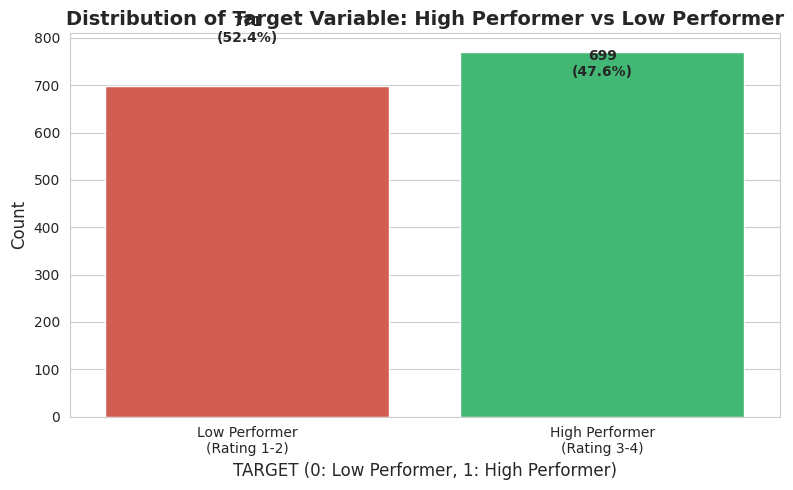

[OK] Saved: 01_target_distribution.png


<Figure size 800x500 with 0 Axes>

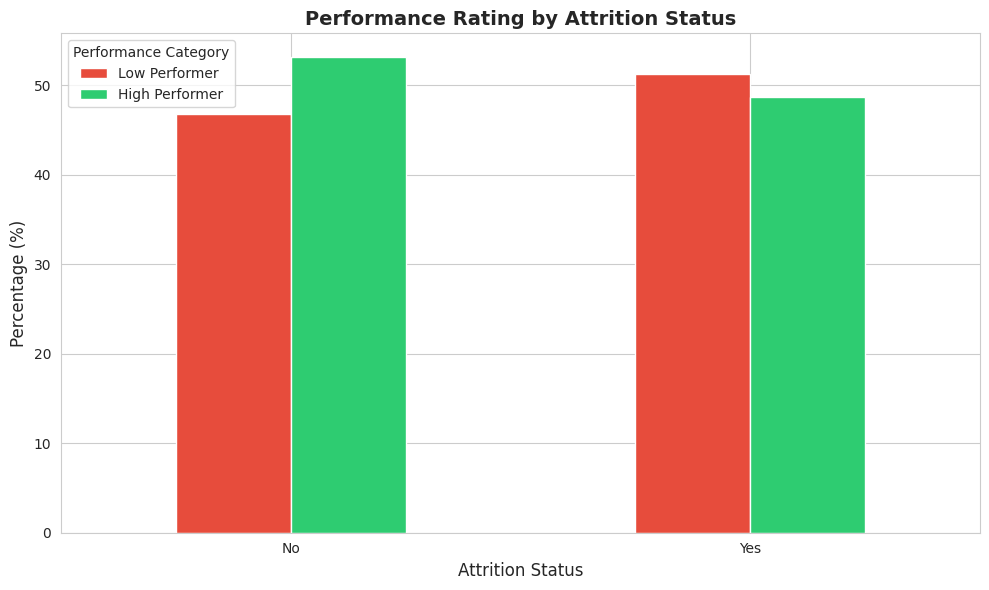

[OK] Saved: 02_performance_by_attrition.png


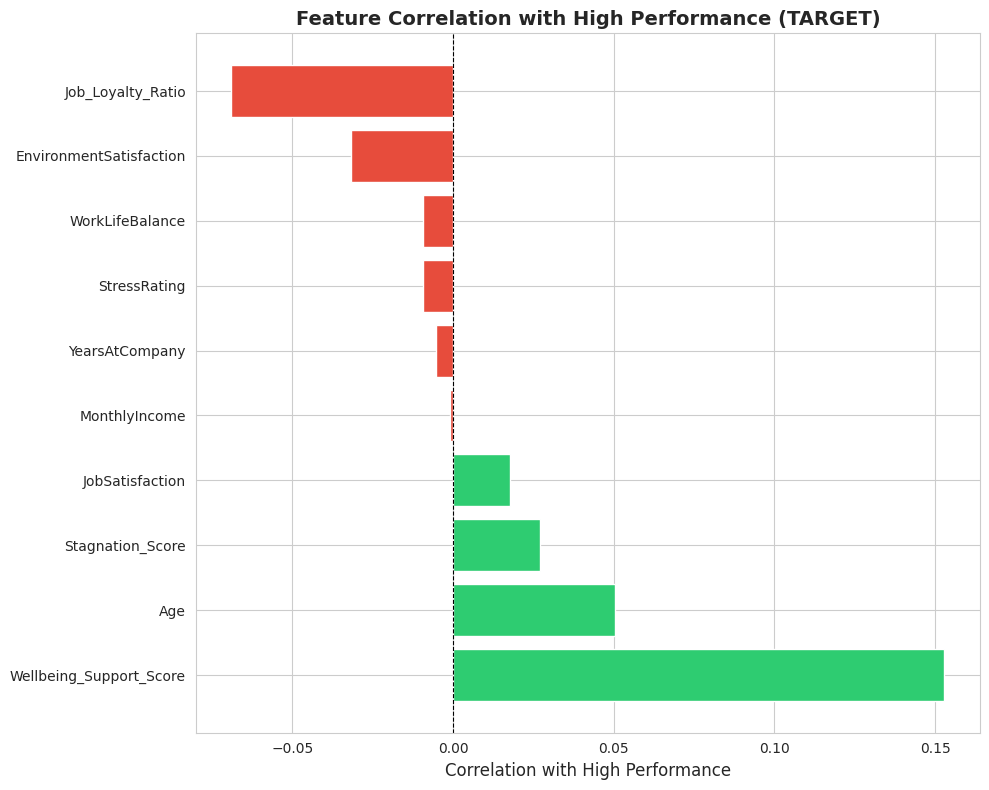

[OK] Saved: 03_correlation_analysis.png


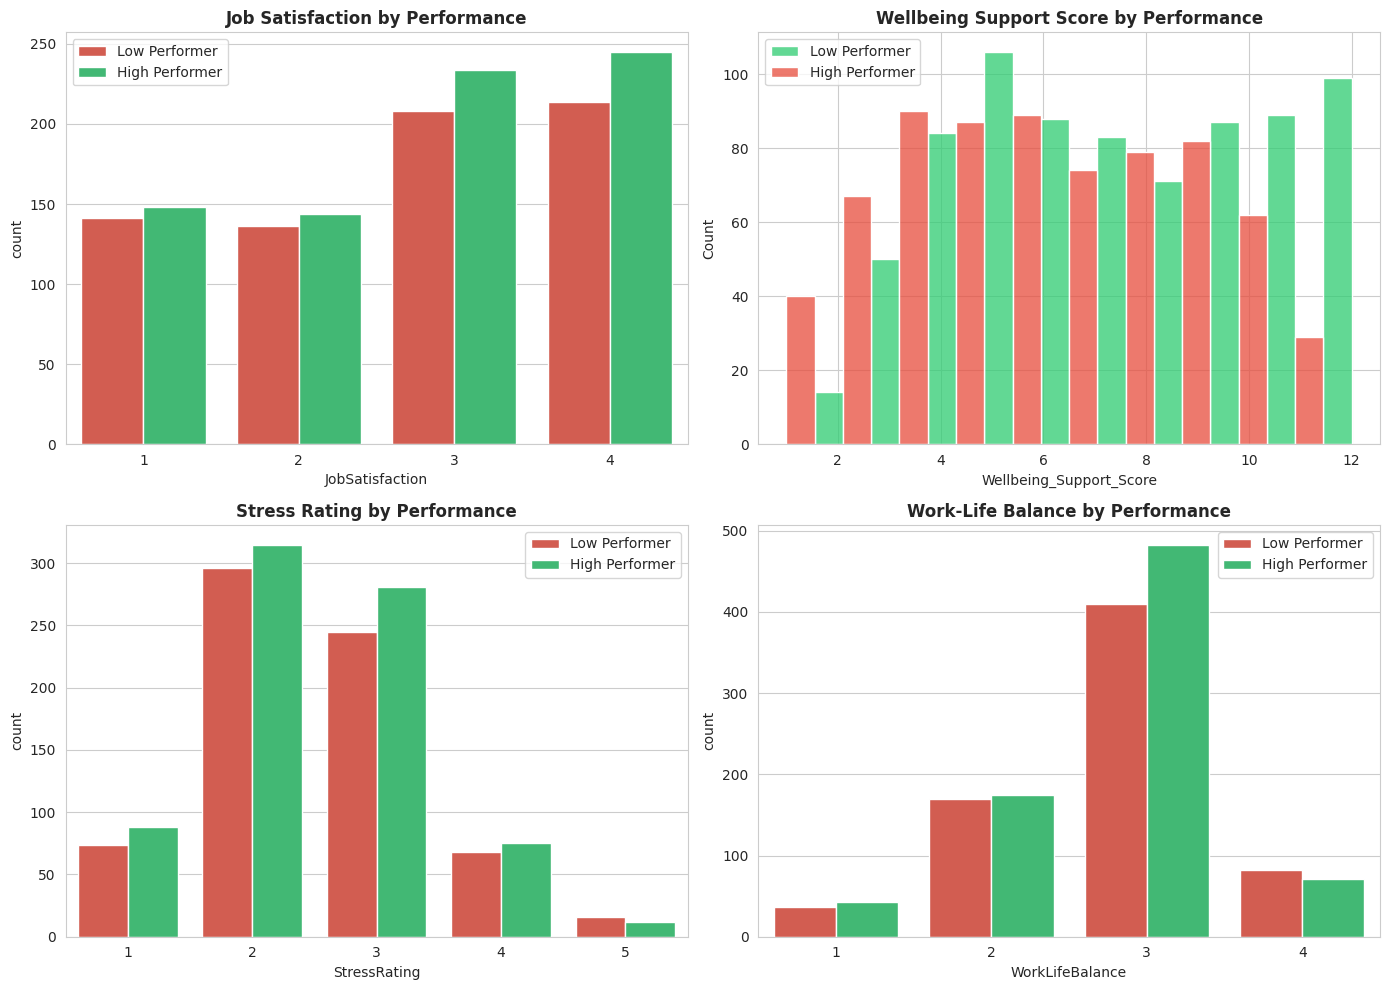

[OK] Saved: 04_key_features_distribution.png

[STEP 6] Preparing Data for Machine Learning Model...
Training set size: 1176 samples
Testing set size: 294 samples

[STEP 7] Building Preprocessing Pipeline...
Preprocessing configured:
  - Numerical features: 13
  - Ordinal features: 12
  - Categorical features: 9

[STEP 8] Building and Training Machine Learning Model...
Training Random Forest Classifier...
[OK] Model training complete!

[STEP 9] Model Evaluation...
MODEL NAME: Random Forest Classifier
EVALUATION METRIC: Accuracy
ACCURACY SCORE: 0.7449 (74.49%)
MACRO F1-SCORE: 0.7440
WEIGHTED F1-SCORE: 0.7433

Detailed Classification Report:
                precision    recall  f1-score   support

 Low Performer       0.69      0.84      0.76       140
High Performer       0.82      0.66      0.73       154

      accuracy                           0.74       294
     macro avg       0.76      0.75      0.74       294
  weighted avg       0.76      0.74      0.74       294



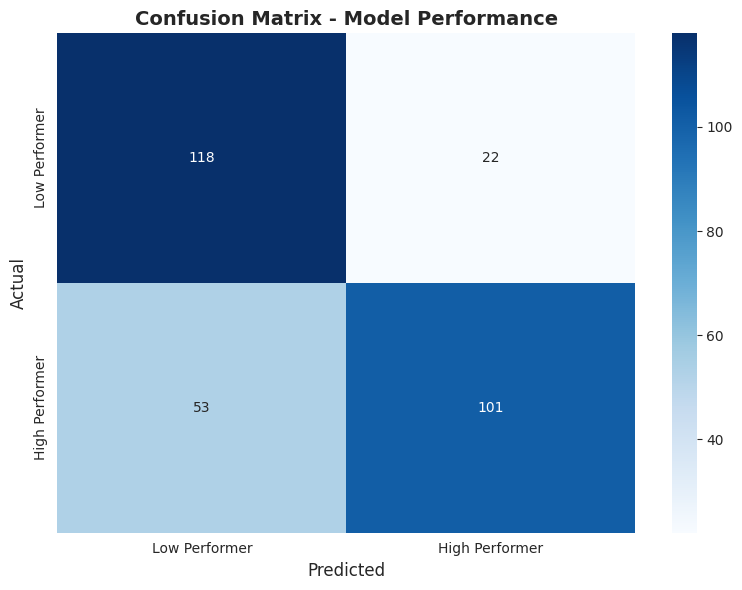

[OK] Saved: 05_confusion_matrix.png

[STEP 10] Extracting Feature Importance for Business Insights...
[OK] Saved: feature_importance_results.csv

Top 20 Most Important Features:
                 Feature  Importance
               Incentive    0.233735
      MonthlyAchievement    0.054772
           MonthlyIncome    0.052210
 Wellbeing_Support_Score    0.049170
                     Age    0.031682
          YearsAtCompany    0.029222
        DistanceFromHome    0.027035
       Job_Loyalty_Ratio    0.025362
       TotalWorkingYears    0.024405
    YearsWithCurrManager    0.020880
      YearsInCurrentRole    0.019409
      NumCompaniesWorked    0.019408
        Stagnation_Score    0.017917
     HowToEmploy_agent_B    0.017160
   TrainingTimesLastYear    0.016241
               Education    0.014835
RelationshipSatisfaction    0.014511
            StressRating    0.014001
 EnvironmentSatisfaction    0.012558
         WorkLifeBalance    0.012273


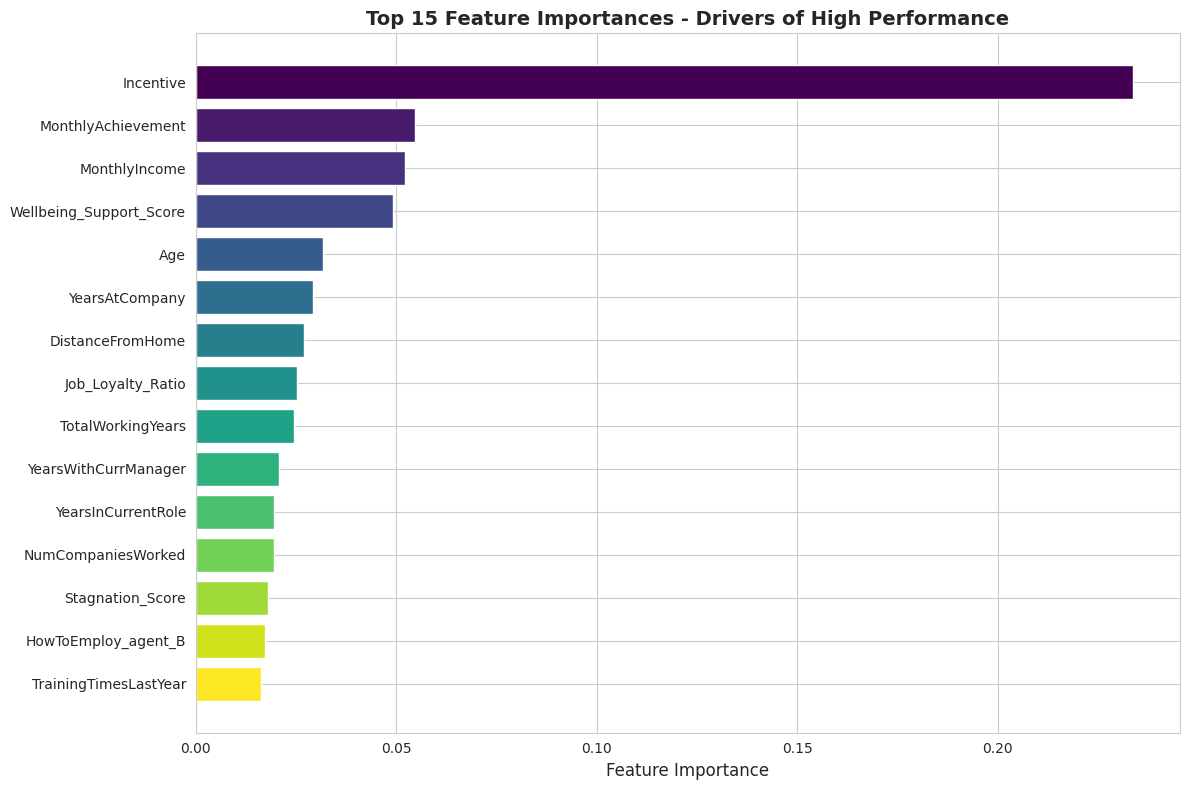

[OK] Saved: 06_feature_importance_top15.png

BUSINESS INSIGHTS SUMMARY FOR PROPOSAL

[KEY FINDINGS FROM MODEL]
1. Model Accuracy: 74.5% - The model can reliably identify high performers
2. Top 5 Performance Drivers:
   - Incentive: 0.2337
   - MonthlyAchievement: 0.0548
   - MonthlyIncome: 0.0522
   - Wellbeing_Support_Score: 0.0492
   - Age: 0.0317

ANALYSIS COMPLETE - All outputs saved to 'output_plots/' directory

Files Generated:
  1. 01_target_distribution.png
  2. 02_performance_by_attrition.png
  3. 03_correlation_analysis.png
  4. 04_key_features_distribution.png
  5. 05_confusion_matrix.png
  6. 06_feature_importance_top15.png
  7. feature_importance_results.csv


In [ ]:

print("\n[STEP 1] Loading Data...")

# Load the dataset from the input folder
df = pd.read_csv("input/data.csv")

print(f"Dataset loaded successfully. Shape: {df.shape}")
print(f"Columns: {len(df.columns)} features")

print("\n[STEP 2] Data Cleaning...")

# Drop constant and ID columns (no predictive value)
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
df = df.drop(columns=cols_to_drop, errors='ignore')

print(f"Dropped constant/ID columns. New shape: {df.shape}")

# Check for missing values
missing_summary = df.isnull().sum()
if missing_summary.sum() > 0:
    print("\nMissing values found:")
    print(missing_summary[missing_summary > 0])
else:
    print("No missing values detected.")

print("\n[STEP 3] Feature Engineering...")

# Feature 1: Wellbeing Support Score
df['Wellbeing_Support_Score'] = (
    df['WelfareBenefits'] +
    df['InHouseFacility'] +
    df['ExternalFacility'] +
    df['FlexibleWork'] +
    df['RemoteWork']
)
print("[OK] Created Wellbeing_Support_Score")

# Feature 2: Stagnation Score
df['Stagnation_Score'] = df['YearsInCurrentRole'] - df['YearsSinceLastPromotion']
df['Stagnation_Score'] = df['Stagnation_Score'].apply(lambda x: max(0, x))
print("[OK] Created Stagnation_Score")

# Feature 3: Job Loyalty Ratio
df['Job_Loyalty_Ratio'] = df.apply(
    lambda row: row['YearsAtCompany'] / row['TotalWorkingYears'] if row['TotalWorkingYears'] != 0 else 0,
    axis=1
)
print("[OK] Created Job_Loyalty_Ratio")

print("\n[STEP 4] Defining Target Variable...")

# Binary Classification: High Performer (1) vs Low Performer (0)
df['TARGET'] = np.where(df['PerformanceRating'] >= 3, 1, 0)

print(f"Target Variable Created:")
print(f"  - High Performers (1): {(df['TARGET'] == 1).sum()} ({(df['TARGET'] == 1).sum() / len(df) * 100:.1f}%)")
print(f"  - Low Performers (0): {(df['TARGET'] == 0).sum()} ({(df['TARGET'] == 0).sum() / len(df) * 100:.1f}%)")

print("\n[STEP 5] Exploratory Data Analysis (EDA)...")

# Create output directory for plots
os.makedirs('output_plots', exist_ok=True)

# EDA 1: Target Distribution
plt.figure(figsize=(8, 5))
target_counts = df['TARGET'].value_counts()
sns.countplot(x='TARGET', data=df, palette=['#e74c3c', '#2ecc71'])
plt.title('Distribution of Target Variable: High Performer vs Low Performer', fontsize=14, fontweight='bold')
plt.xlabel('TARGET (0: Low Performer, 1: High Performer)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Low Performer\n(Rating 1-2)', 'High Performer\n(Rating 3-4)'])
for i, count in enumerate(target_counts):
    plt.text(i, count + 20, f'{count}\n({count/len(df)*100:.1f}%)', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('output_plots/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("[OK] Saved: 01_target_distribution.png")

# EDA 2: Performance by Attrition
plt.figure(figsize=(8, 5))
attrition_perf = pd.crosstab(df['Attrition'], df['TARGET'], normalize='index') * 100
attrition_perf.plot(kind='bar', stacked=False, color=['#e74c3c', '#2ecc71'])
plt.title('Performance Rating by Attrition Status', fontsize=14, fontweight='bold')
plt.xlabel('Attrition Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Low Performer', 'High Performer'], title='Performance Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('output_plots/02_performance_by_attrition.png', dpi=300, bbox_inches='tight')
plt.show()
print("[OK] Saved: 02_performance_by_attrition.png")

# EDA 3: Correlation Analysis
numerical_cols = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'EnvironmentSatisfaction',
                  'WorkLifeBalance', 'StressRating', 'Wellbeing_Support_Score',
                  'Stagnation_Score', 'Job_Loyalty_Ratio', 'YearsAtCompany', 'TARGET']

correlation_data = df[numerical_cols].corr()['TARGET'].sort_values(ascending=False).drop('TARGET')

plt.figure(figsize=(10, 8))
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in correlation_data.values]
plt.barh(correlation_data.index, correlation_data.values, color=colors)
plt.xlabel('Correlation with High Performance', fontsize=12)
plt.title('Feature Correlation with High Performance (TARGET)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig('output_plots/03_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("[OK] Saved: 03_correlation_analysis.png")

# EDA 4: Distribution of Key Features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(x='JobSatisfaction', hue='TARGET', data=df, ax=axes[0, 0], palette=['#e74c3c', '#2ecc71'])
axes[0, 0].set_title('Job Satisfaction by Performance', fontweight='bold')
axes[0, 0].legend(['Low Performer', 'High Performer'])

sns.histplot(data=df, x='Wellbeing_Support_Score', hue='TARGET', multiple='dodge', bins=10, ax=axes[0, 1], palette=['#e74c3c', '#2ecc71'])
axes[0, 1].set_title('Wellbeing Support Score by Performance', fontweight='bold')
axes[0, 1].legend(['Low Performer', 'High Performer'])

sns.countplot(x='StressRating', hue='TARGET', data=df, ax=axes[1, 0], palette=['#e74c3c', '#2ecc71'])
axes[1, 0].set_title('Stress Rating by Performance', fontweight='bold')
axes[1, 0].legend(['Low Performer', 'High Performer'])

sns.countplot(x='WorkLifeBalance', hue='TARGET', data=df, ax=axes[1, 1], palette=['#e74c3c', '#2ecc71'])
axes[1, 1].set_title('Work-Life Balance by Performance', fontweight='bold')
axes[1, 1].legend(['Low Performer', 'High Performer'])

plt.tight_layout()
plt.savefig('output_plots/04_key_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("[OK] Saved: 04_key_features_distribution.png")
print("\n[STEP 6] Preparing Data for Machine Learning Model...")

X = df.drop(columns=['TARGET', 'PerformanceIndex', 'PerformanceRating', 'Attrition'])
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("\n[STEP 7] Building Preprocessing Pipeline...")

numerical_features = [
    'Age', 'DistanceFromHome', 'TotalWorkingYears', 'MonthlyIncome', 'MonthlyAchievement',
    'Wellbeing_Support_Score', 'Stagnation_Score', 'Job_Loyalty_Ratio', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsWithCurrManager', 'TrainingTimesLastYear', 'NumCompaniesWorked'
]

ordinal_features = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance',
    'StockOptionLevel', 'StressRating', 'StressSelfReported', 'Incentive', 'ExtendedLeave'
]

categorical_features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'HowToEmploy', 'OverTime', 'Year'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', 'passthrough', ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

print(f"Preprocessing configured:")
print(f"  - Numerical features: {len(numerical_features)}")
print(f"  - Ordinal features: {len(ordinal_features)}")
print(f"  - Categorical features: {len(categorical_features)}")
print("\n[STEP 8] Building and Training Machine Learning Model...")

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        class_weight='balanced'
    ))
])

print("Training Random Forest Classifier...")
model_pipeline.fit(X_train, y_train)
print("[OK] Model training complete!")
print("\n[STEP 9] Model Evaluation...")
print("="*80)

y_pred = model_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# CRITICAL: Display model name, metric, and score
print("MODEL NAME: Random Forest Classifier")
print(f"EVALUATION METRIC: Accuracy")
print(f"ACCURACY SCORE: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"MACRO F1-SCORE: {f1_macro:.4f}")
print(f"WEIGHTED F1-SCORE: {f1_weighted:.4f}")
print("="*80)

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Performer', 'High Performer']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Low Performer', 'High Performer'],
            yticklabels=['Low Performer', 'High Performer'])
plt.title('Confusion Matrix - Model Performance', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('output_plots/05_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("[OK] Saved: 05_confusion_matrix.png")
print("\n[STEP 10] Extracting Feature Importance for Business Insights...")

feature_importances = model_pipeline.named_steps['classifier'].feature_importances_

feature_names_numerical = numerical_features
feature_names_ordinal = ordinal_features
ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)

all_feature_names = feature_names_numerical + feature_names_ordinal + list(ohe_feature_names)

importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.to_csv('output_plots/feature_importance_results.csv', index=False)
print("[OK] Saved: feature_importance_results.csv")

print("\nTop 20 Most Important Features:")
print(importance_df.head(20).to_string(index=False))

# Visualize top 15 features
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
plt.barh(top_features['Feature'], top_features['Importance'], color=colors)
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Feature Importances - Drivers of High Performance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('output_plots/06_feature_importance_top15.png', dpi=300, bbox_inches='tight')
plt.show()
print("[OK] Saved: 06_feature_importance_top15.png")
print("\n" + "="*80)
print("BUSINESS INSIGHTS SUMMARY FOR PROPOSAL")
print("="*80)

print("\n[KEY FINDINGS FROM MODEL]")
print(f"1. Model Accuracy: {accuracy*100:.1f}% - The model can reliably identify high performers")
print(f"2. Top 5 Performance Drivers:")

top_5_features = importance_df.head(5)
for idx, row in top_5_features.iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE - All outputs saved to 'output_plots/' directory")
print("="*80)

print("\nFiles Generated:")
print("  1. 01_target_distribution.png")
print("  2. 02_performance_by_attrition.png")
print("  3. 03_correlation_analysis.png")
print("  4. 04_key_features_distribution.png")
print("  5. 05_confusion_matrix.png")
print("  6. 06_feature_importance_top15.png")
print("  7. feature_importance_results.csv")


EMPLOYEE PERFORMANCE PREDICTION - ML MODEL & BUSINESS PROPOSAL

[STEP 1] Loading Data...
Dataset loaded successfully. Shape: (1470, 44)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'PerformanceIndex', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyAchievement', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'HowToEmploy', 'Incentive', 'RemoteWork', 'MonthlyIncome', 'StressRating', 'WelfareBenefits', 'InHouseFacility', 'ExternalFacility', 'ExtendedLeave', 'FlexibleWork', 'StressSelfReported', 'Year']

[STEP 2] Data Cleaning...
Dropped constant/ID columns. New shape: (1470, 40)


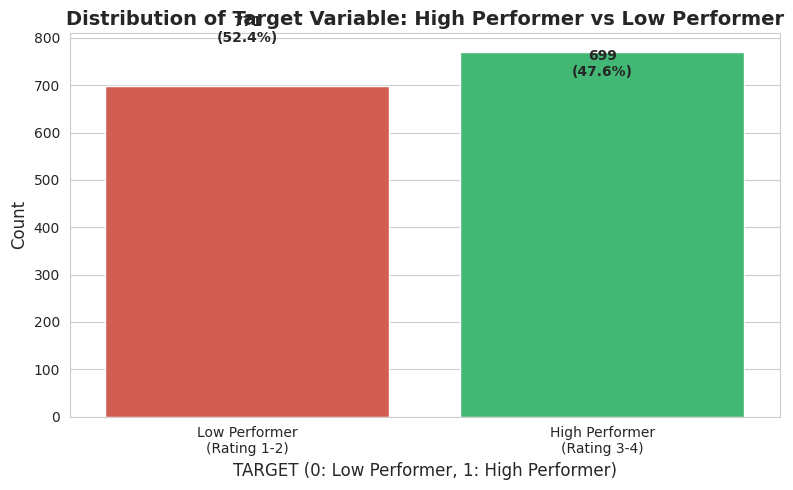

✓ Saved: 01_target_distribution.png


<Figure size 800x500 with 0 Axes>

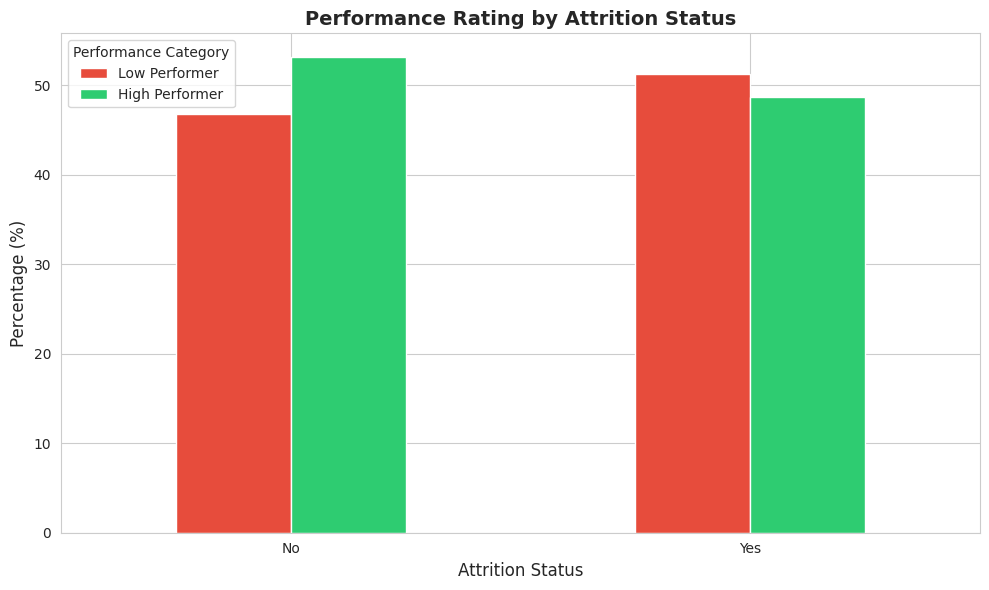

✓ Saved: 02_performance_by_attrition.png


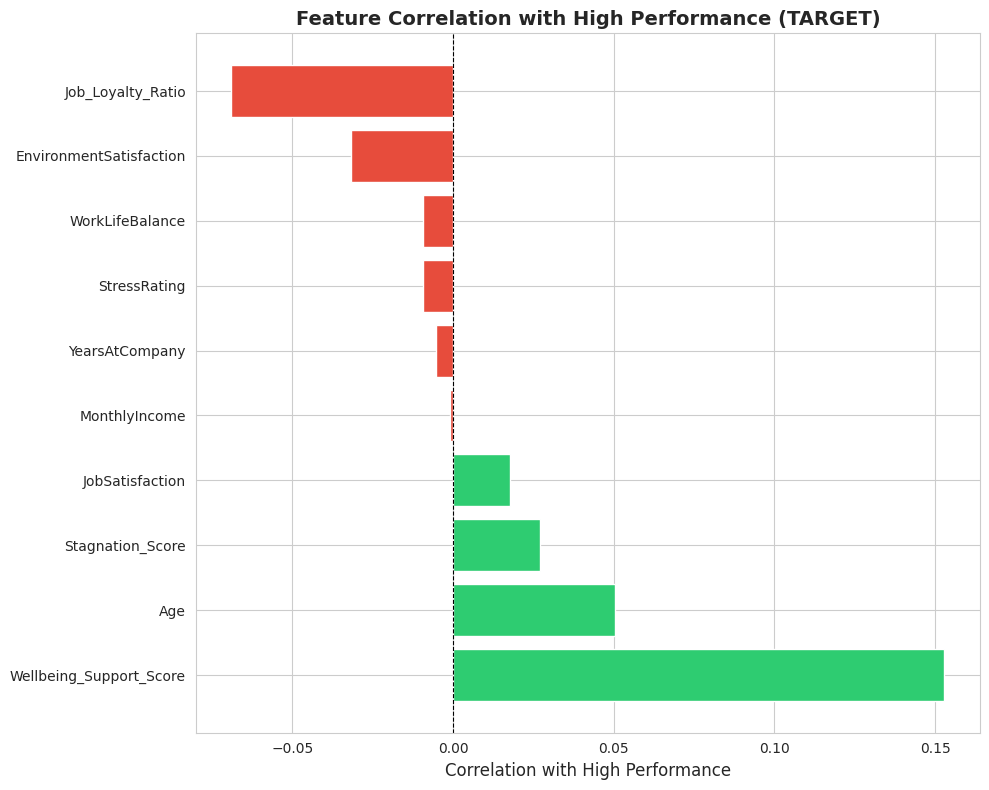

✓ Saved: 03_correlation_analysis.png


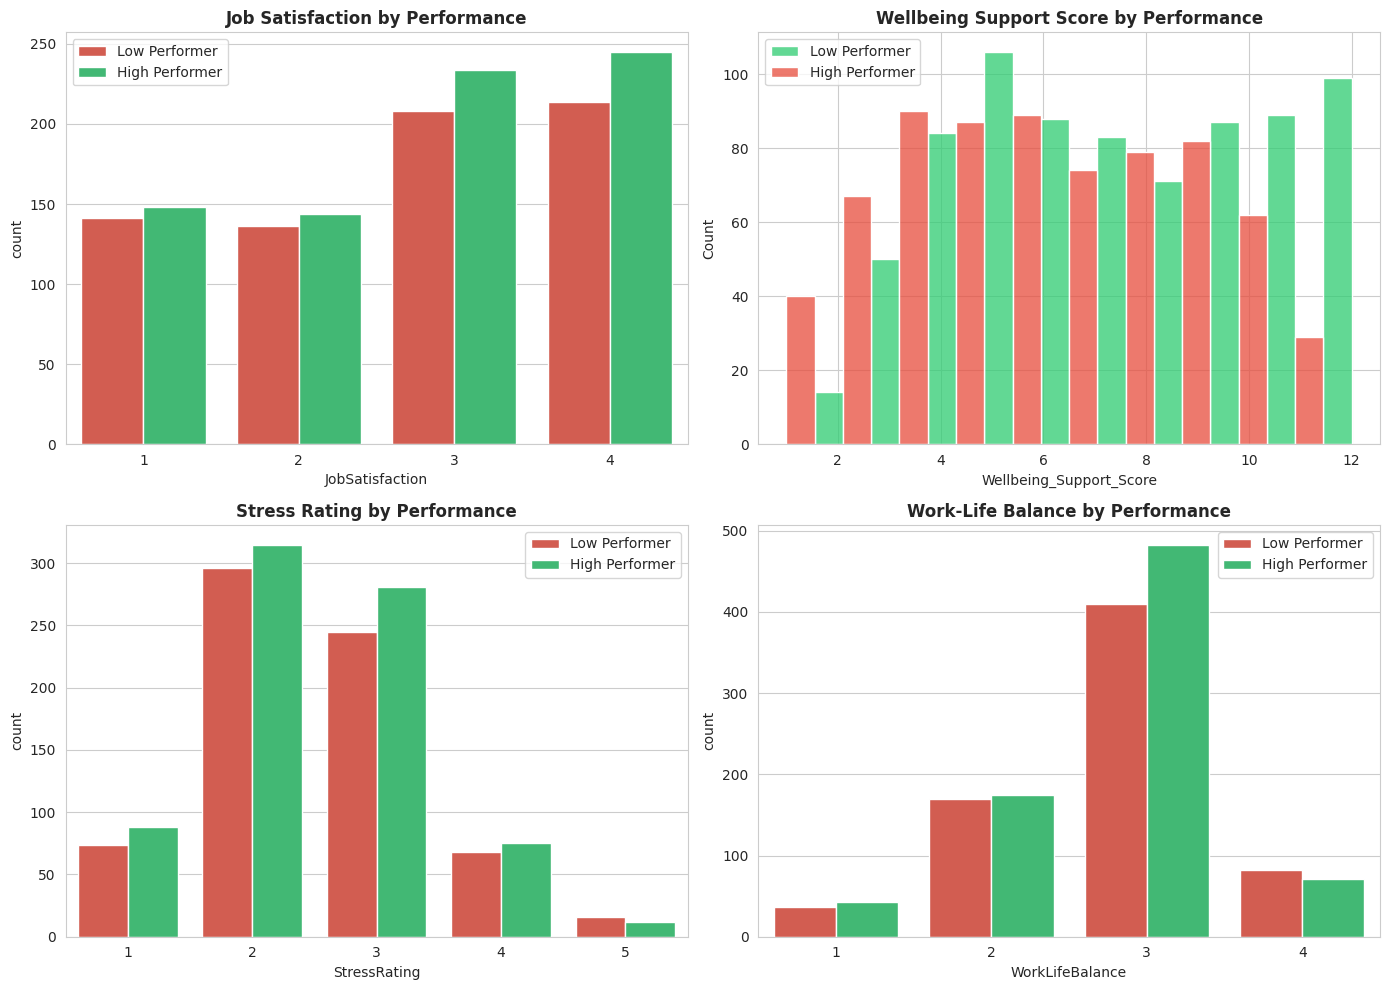

✓ Saved: 04_key_features_distribution.png

[STEP 6] Preparing Data for Machine Learning Model...
Training set size: 1176 samples
Testing set size: 294 samples

[STEP 7] Building Preprocessing Pipeline...
Preprocessing configured:
  - Numerical features: 13
  - Ordinal features: 12
  - Categorical features: 9

[STEP 8] Building and Training Machine Learning Model...
Training Random Forest Classifier...
✓ Model training complete!

[STEP 9] Model Evaluation...
MODEL NAME: Random Forest Classifier
EVALUATION METRIC: Accuracy
ACCURACY SCORE: 0.7449 (74.49%)
MACRO F1-SCORE: 0.7440
WEIGHTED F1-SCORE: 0.7433

Detailed Classification Report:
                precision    recall  f1-score   support

 Low Performer       0.69      0.84      0.76       140
High Performer       0.82      0.66      0.73       154

      accuracy                           0.74       294
     macro avg       0.76      0.75      0.74       294
  weighted avg       0.76      0.74      0.74       294



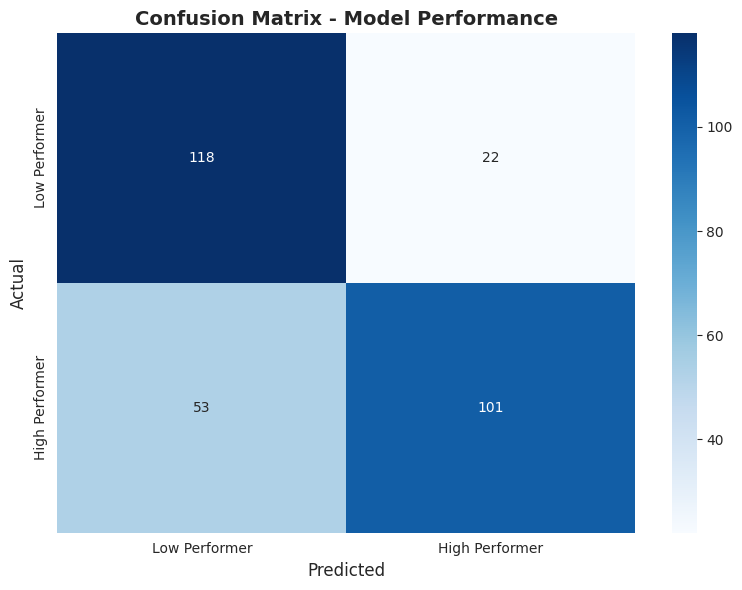

✓ Saved: 05_confusion_matrix.png

[STEP 10] Extracting Feature Importance for Business Insights...
✓ Saved: feature_importance_results.csv

Top 20 Most Important Features:
                 Feature  Importance
               Incentive    0.233735
      MonthlyAchievement    0.054772
           MonthlyIncome    0.052210
 Wellbeing_Support_Score    0.049170
                     Age    0.031682
          YearsAtCompany    0.029222
        DistanceFromHome    0.027035
       Job_Loyalty_Ratio    0.025362
       TotalWorkingYears    0.024405
    YearsWithCurrManager    0.020880
      YearsInCurrentRole    0.019409
      NumCompaniesWorked    0.019408
        Stagnation_Score    0.017917
     HowToEmploy_agent_B    0.017160
   TrainingTimesLastYear    0.016241
               Education    0.014835
RelationshipSatisfaction    0.014511
            StressRating    0.014001
 EnvironmentSatisfaction    0.012558
         WorkLifeBalance    0.012273


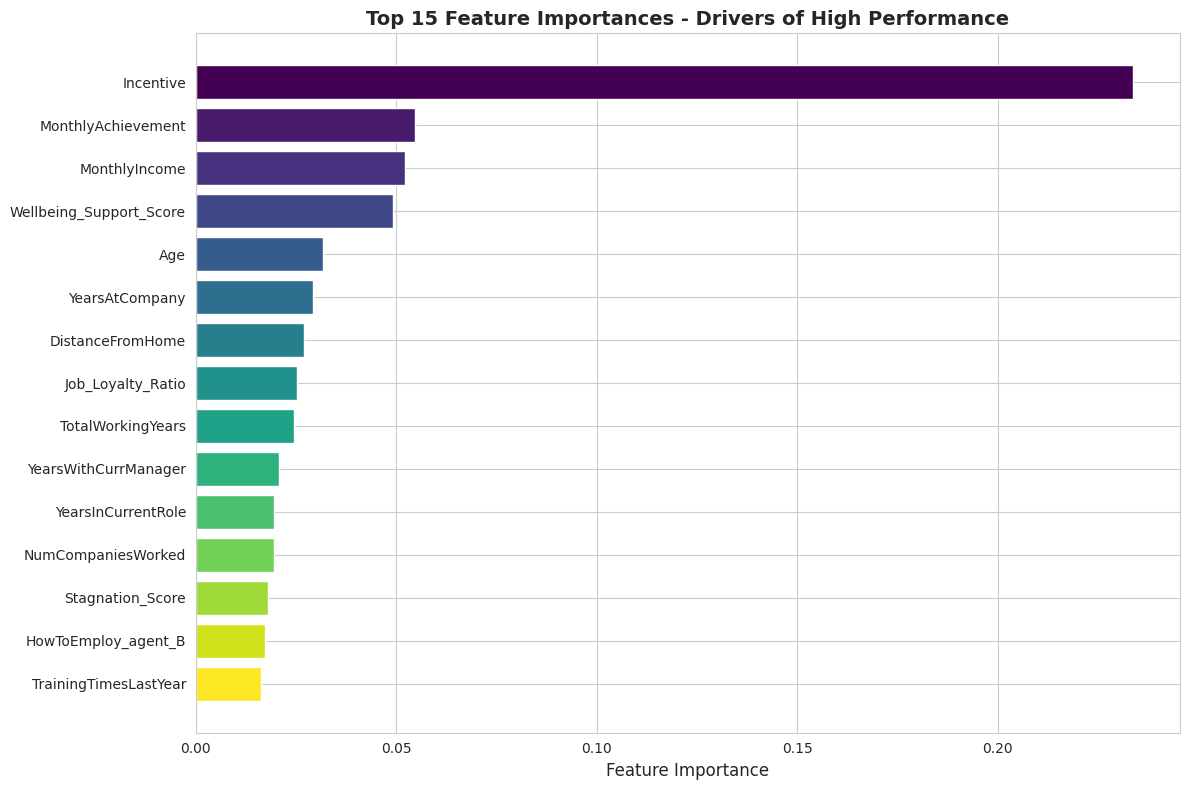

✓ Saved: 06_feature_importance_top15.png

BUSINESS INSIGHTS SUMMARY FOR PROPOSAL

[KEY FINDINGS FROM MODEL]
1. Model Accuracy: 74.5% - The model can reliably identify high performers
2. Top 5 Performance Drivers:
   - Incentive: 0.2337
   - MonthlyAchievement: 0.0548
   - MonthlyIncome: 0.0522
   - Wellbeing_Support_Score: 0.0492
   - Age: 0.0317

ANALYSIS COMPLETE - All outputs saved to 'output_plots/' directory

Files Generated:
  1. 01_target_distribution.png
  2. 02_performance_by_attrition.png
  3. 03_correlation_analysis.png
  4. 04_key_features_distribution.png
  5. 05_confusion_matrix.png
  6. 06_feature_importance_top15.png
  7. feature_importance_results.csv


In [ ]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("="*80)
print("EMPLOYEE PERFORMANCE PREDICTION - ML MODEL & BUSINESS PROPOSAL")
print("="*80)

print("\n[STEP 1] Loading Data...")

# Load the dataset
df = pd.read_csv("input/data.csv")

print(f"Dataset loaded successfully. Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\n[STEP 2] Data Cleaning...")

# Drop constant and ID columns (no predictive value)
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
df = df.drop(columns=cols_to_drop, errors='ignore')

print(f"Dropped constant/ID columns. New shape: {df.shape}")

# Check for missing values
missing_summary = df.isnull().sum()
if missing_summary.sum() > 0:
    print("\nMissing values found:")
    print(missing_summary[missing_summary > 0])
else:
    print("No missing values detected.")
print("\n[STEP 3] Feature Engineering...")

# Feature 1: Wellbeing Support Score
# Aggregates all well-being and flexibility benefits
df['Wellbeing_Support_Score'] = (
    df['WelfareBenefits'] +
    df['InHouseFacility'] +
    df['ExternalFacility'] +
    df['FlexibleWork'] +
    df['RemoteWork']
)
print("✓ Created Wellbeing_Support_Score")

# Feature 2: Stagnation Score
# Measures career stagnation (time in role without promotion)
df['Stagnation_Score'] = df['YearsInCurrentRole'] - df['YearsSinceLastPromotion']
df['Stagnation_Score'] = df['Stagnation_Score'].apply(lambda x: max(0, x))
print("✓ Created Stagnation_Score")

# Feature 3: Job Loyalty Ratio
# Proportion of career spent at current company
df['Job_Loyalty_Ratio'] = df.apply(
    lambda row: row['YearsAtCompany'] / row['TotalWorkingYears'] if row['TotalWorkingYears'] != 0 else 0,
    axis=1
)
print("✓ Created Job_Loyalty_Ratio")

print("\n[STEP 4] Defining Target Variable...")

# Binary Classification: High Performer (1) vs Low Performer (0)
# High Performer: PerformanceRating >= 3 (ratings 3 and 4)
# Low Performer: PerformanceRating < 3 (ratings 1 and 2)
df['TARGET'] = np.where(df['PerformanceRating'] >= 3, 1, 0)

print(f"Target Variable Created:")
print(f"  - High Performers (1): {(df['TARGET'] == 1).sum()} ({(df['TARGET'] == 1).sum() / len(df) * 100:.1f}%)")
print(f"  - Low Performers (0): {(df['TARGET'] == 0).sum()} ({(df['TARGET'] == 0).sum() / len(df) * 100:.1f}%)")
print("\n[STEP 5] Exploratory Data Analysis (EDA)...")

# Create output directory for plots
import os
os.makedirs('output_plots', exist_ok=True)

# EDA 1: Target Distribution
plt.figure(figsize=(8, 5))
target_counts = df['TARGET'].value_counts()
sns.countplot(x='TARGET', data=df, palette=['#e74c3c', '#2ecc71'])
plt.title('Distribution of Target Variable: High Performer vs Low Performer', fontsize=14, fontweight='bold')
plt.xlabel('TARGET (0: Low Performer, 1: High Performer)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Low Performer\n(Rating 1-2)', 'High Performer\n(Rating 3-4)'])
for i, count in enumerate(target_counts):
    plt.text(i, count + 20, f'{count}\n({count/len(df)*100:.1f}%)', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('output_plots/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 01_target_distribution.png")

# EDA 2: Performance by Attrition
plt.figure(figsize=(8, 5))
attrition_perf = pd.crosstab(df['Attrition'], df['TARGET'], normalize='index') * 100
attrition_perf.plot(kind='bar', stacked=False, color=['#e74c3c', '#2ecc71'])
plt.title('Performance Rating by Attrition Status', fontsize=14, fontweight='bold')
plt.xlabel('Attrition Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Low Performer', 'High Performer'], title='Performance Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('output_plots/02_performance_by_attrition.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 02_performance_by_attrition.png")

# EDA 3: Correlation with Target (Numerical Features)
numerical_cols = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'EnvironmentSatisfaction',
                  'WorkLifeBalance', 'StressRating', 'Wellbeing_Support_Score',
                  'Stagnation_Score', 'Job_Loyalty_Ratio', 'YearsAtCompany', 'TARGET']

correlation_data = df[numerical_cols].corr()['TARGET'].sort_values(ascending=False).drop('TARGET')

plt.figure(figsize=(10, 8))
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in correlation_data.values]
plt.barh(correlation_data.index, correlation_data.values, color=colors)
plt.xlabel('Correlation with High Performance', fontsize=12)
plt.title('Feature Correlation with High Performance (TARGET)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig('output_plots/03_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 03_correlation_analysis.png")

# EDA 4: Distribution of Key Features by Performance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# JobSatisfaction
sns.countplot(x='JobSatisfaction', hue='TARGET', data=df, ax=axes[0, 0], palette=['#e74c3c', '#2ecc71'])
axes[0, 0].set_title('Job Satisfaction by Performance', fontweight='bold')
axes[0, 0].legend(['Low Performer', 'High Performer'])

# Wellbeing_Support_Score
sns.histplot(data=df, x='Wellbeing_Support_Score', hue='TARGET', multiple='dodge', bins=10, ax=axes[0, 1], palette=['#e74c3c', '#2ecc71'])
axes[0, 1].set_title('Wellbeing Support Score by Performance', fontweight='bold')
axes[0, 1].legend(['Low Performer', 'High Performer'])

# StressRating
sns.countplot(x='StressRating', hue='TARGET', data=df, ax=axes[1, 0], palette=['#e74c3c', '#2ecc71'])
axes[1, 0].set_title('Stress Rating by Performance', fontweight='bold')
axes[1, 0].legend(['Low Performer', 'High Performer'])

# WorkLifeBalance
sns.countplot(x='WorkLifeBalance', hue='TARGET', data=df, ax=axes[1, 1], palette=['#e74c3c', '#2ecc71'])
axes[1, 1].set_title('Work-Life Balance by Performance', fontweight='bold')
axes[1, 1].legend(['Low Performer', 'High Performer'])

plt.tight_layout()
plt.savefig('output_plots/04_key_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 04_key_features_distribution.png")
print("\n[STEP 6] Preparing Data for Machine Learning Model...")

# Define features (X) and target (y)
X = df.drop(columns=['TARGET', 'PerformanceIndex', 'PerformanceRating', 'Attrition'])
y = df['TARGET']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("\n[STEP 7] Building Preprocessing Pipeline...")

# Categorize features by type
numerical_features = [
    'Age', 'DistanceFromHome', 'TotalWorkingYears', 'MonthlyIncome', 'MonthlyAchievement',
    'Wellbeing_Support_Score', 'Stagnation_Score', 'Job_Loyalty_Ratio', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsWithCurrManager', 'TrainingTimesLastYear', 'NumCompaniesWorked'
]

ordinal_features = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance',
    'StockOptionLevel', 'StressRating', 'StressSelfReported', 'Incentive', 'ExtendedLeave'
]

categorical_features = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'HowToEmploy', 'OverTime', 'Year'
]

# Create preprocessing transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', 'passthrough', ordinal_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

print(f"Preprocessing configured:")
print(f"  - Numerical features: {len(numerical_features)}")
print(f"  - Ordinal features: {len(ordinal_features)}")
print(f"  - Categorical features: {len(categorical_features)}")
print("\n[STEP 8] Building and Training Machine Learning Model...")

# Create the ML pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        class_weight='balanced'
    ))
])

# Train the model
print("Training Random Forest Classifier...")
model_pipeline.fit(X_train, y_train)
print("✓ Model training complete!")
print("\n[STEP 9] Model Evaluation...")
print("="*80)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

# CRITICAL: Display model name, metric, and score (ASSIGNMENT REQUIREMENT)
print("MODEL NAME: Random Forest Classifier")
print(f"EVALUATION METRIC: Accuracy")
print(f"ACCURACY SCORE: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"MACRO F1-SCORE: {f1_macro:.4f}")
print(f"WEIGHTED F1-SCORE: {f1_weighted:.4f}")
print("="*80)

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low Performer', 'High Performer']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Low Performer', 'High Performer'],
            yticklabels=['Low Performer', 'High Performer'])
plt.title('Confusion Matrix - Model Performance', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('output_plots/05_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 05_confusion_matrix.png")
print("\n[STEP 10] Extracting Feature Importance for Business Insights...")

# Get feature importances from the trained Random Forest
feature_importances = model_pipeline.named_steps['classifier'].feature_importances_

# Get feature names after preprocessing
feature_names_numerical = numerical_features
feature_names_ordinal = ordinal_features
ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = feature_names_numerical + feature_names_ordinal + list(ohe_feature_names)

# Create DataFrame for analysis
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Save to CSV
importance_df.to_csv('output_plots/feature_importance_results.csv', index=False)
print("✓ Saved: feature_importance_results.csv")

# Display top 20 features
print("\nTop 20 Most Important Features:")
print(importance_df.head(20).to_string(index=False))

# Visualize top 15 features
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
plt.barh(top_features['Feature'], top_features['Importance'], color=colors)
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Top 15 Feature Importances - Drivers of High Performance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('output_plots/06_feature_importance_top15.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved: 06_feature_importance_top15.png")

print("\n" + "="*80)
print("BUSINESS INSIGHTS SUMMARY FOR PROPOSAL")
print("="*80)

print("\n[KEY FINDINGS FROM MODEL]")
print(f"1. Model Accuracy: {accuracy*100:.1f}% - The model can reliably identify high performers")
print(f"2. Top 5 Performance Drivers:")

top_5_features = importance_df.head(5)
for idx, row in top_5_features.iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")



print("\n" + "="*80)
print("ANALYSIS COMPLETE - All outputs saved to 'output_plots/' directory")
print("="*80)

print("\nFiles Generated:")
print("  1. 01_target_distribution.png")
print("  2. 02_performance_by_attrition.png")
print("  3. 03_correlation_analysis.png")
print("  4. 04_key_features_distribution.png")
print("  5. 05_confusion_matrix.png")
print("  6. 06_feature_importance_top15.png")
print("  7. feature_importance_results.csv")

